# Top Hits Spotify - Supervised Learning
## Work Specification
The main purpose of this project was to learn how to classify examples in terms of the concept under analysis given a dataset, using <b>Supervised Learning</b>.

We were given a dataset regarding the top spotify hits from 2000 to 2019 and our goal was to develop a model which will take in the attributes of a certain music track and predict its popularity.

## Group 12_1B
- André Flores - up201907001
- Diogo Faria - up201907014
- Tiago Rodrigues - up201906807


## Importing the Dataset

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

top_hits = pd.read_csv('..\docs\songs_normalize.csv')

### Attributes

- **artist:** Name of the Artist.
- **song:** Name of the Track.
- **duration_ms:** Duration of the track in milliseconds.
- **explicit:** The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
- **year:** Release Year of the track.
- **popularity:** The higher the value the more popular the song is.
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
- **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- **loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- **genre:** Genre of the track.

In [2]:
top_hits.head()

artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
3        Bon Jovi            It's My Life       224493     False  2000   
4          *NSYNC             Bye Bye Bye       200560     False  2000   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.751   0.834    1    -5.444     0       0.0437   
1          79         0.434   0.897    0    -4.918     1       0.0488   
2          66         0.529   0.496    7    -9.007     1       0.0290   
3          78         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo         genre  
0        0.3000          0.000018    0.3550    0.894   95.053           pop  
1        0.0103          0.000000    0.6120    0.684  148.726     rock, pop  
2        0.1730          0.000000    0.2510    0.278  136.859  pop, country  
3        0.0263          0.000013    0.3470    0.544  119.992   rock, metal  
4        0.0408          0.001040    0.0845    0.879  172.656           pop

## Data pre-processing

### Error Data
First we checked for null values:

In [3]:
top_hits.isnull().any().sum()

0

As there were no null values, we checked the data itself, and found that certain values of the column 'genre' had the value 'set()', which was an error, so those rows of data were removed:

In [4]:
top_hits = top_hits[top_hits.genre != "set()"]

We added an id to each row as to make it easier to check for outliers

In [5]:
top_hits['id'] = top_hits.index + 1

### Outliers
To check for outliers, we looked at a scatterplot matrix, though we had to temporarily remove some data since pairplot method won't be able to handle any non-numerical values.

Thus, we removed the columns that had objects or booleans:

In [6]:
import seaborn as sb
top_hits_scatter = top_hits.copy()
for col in top_hits_scatter.columns:
    if top_hits_scatter[col].dtype in ["object", "bool"]:
        top_hits_scatter = top_hits_scatter.drop(columns=[col], axis=1)

top_hits_scatter.head()

duration_ms  year  popularity  danceability  energy  key  loudness  mode  \
0       211160  2000          77         0.751   0.834    1    -5.444     0   
1       167066  1999          79         0.434   0.897    0    -4.918     1   
2       250546  1999          66         0.529   0.496    7    -9.007     1   
3       224493  2000          78         0.551   0.913    0    -4.063     0   
4       200560  2000          65         0.614   0.928    8    -4.806     0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  id  
0       0.0437        0.3000          0.000018    0.3550    0.894   95.053   1  
1       0.0488        0.0103          0.000000    0.6120    0.684  148.726   2  
2       0.0290        0.1730          0.000000    0.2510    0.278  136.859   3  
3       0.0466        0.0263          0.000013    0.3470    0.544  119.992   4  
4       0.0516        0.0408          0.001040    0.0845    0.879  172.656   5

After the data was changed, we were able to get the scatterplot matrix:

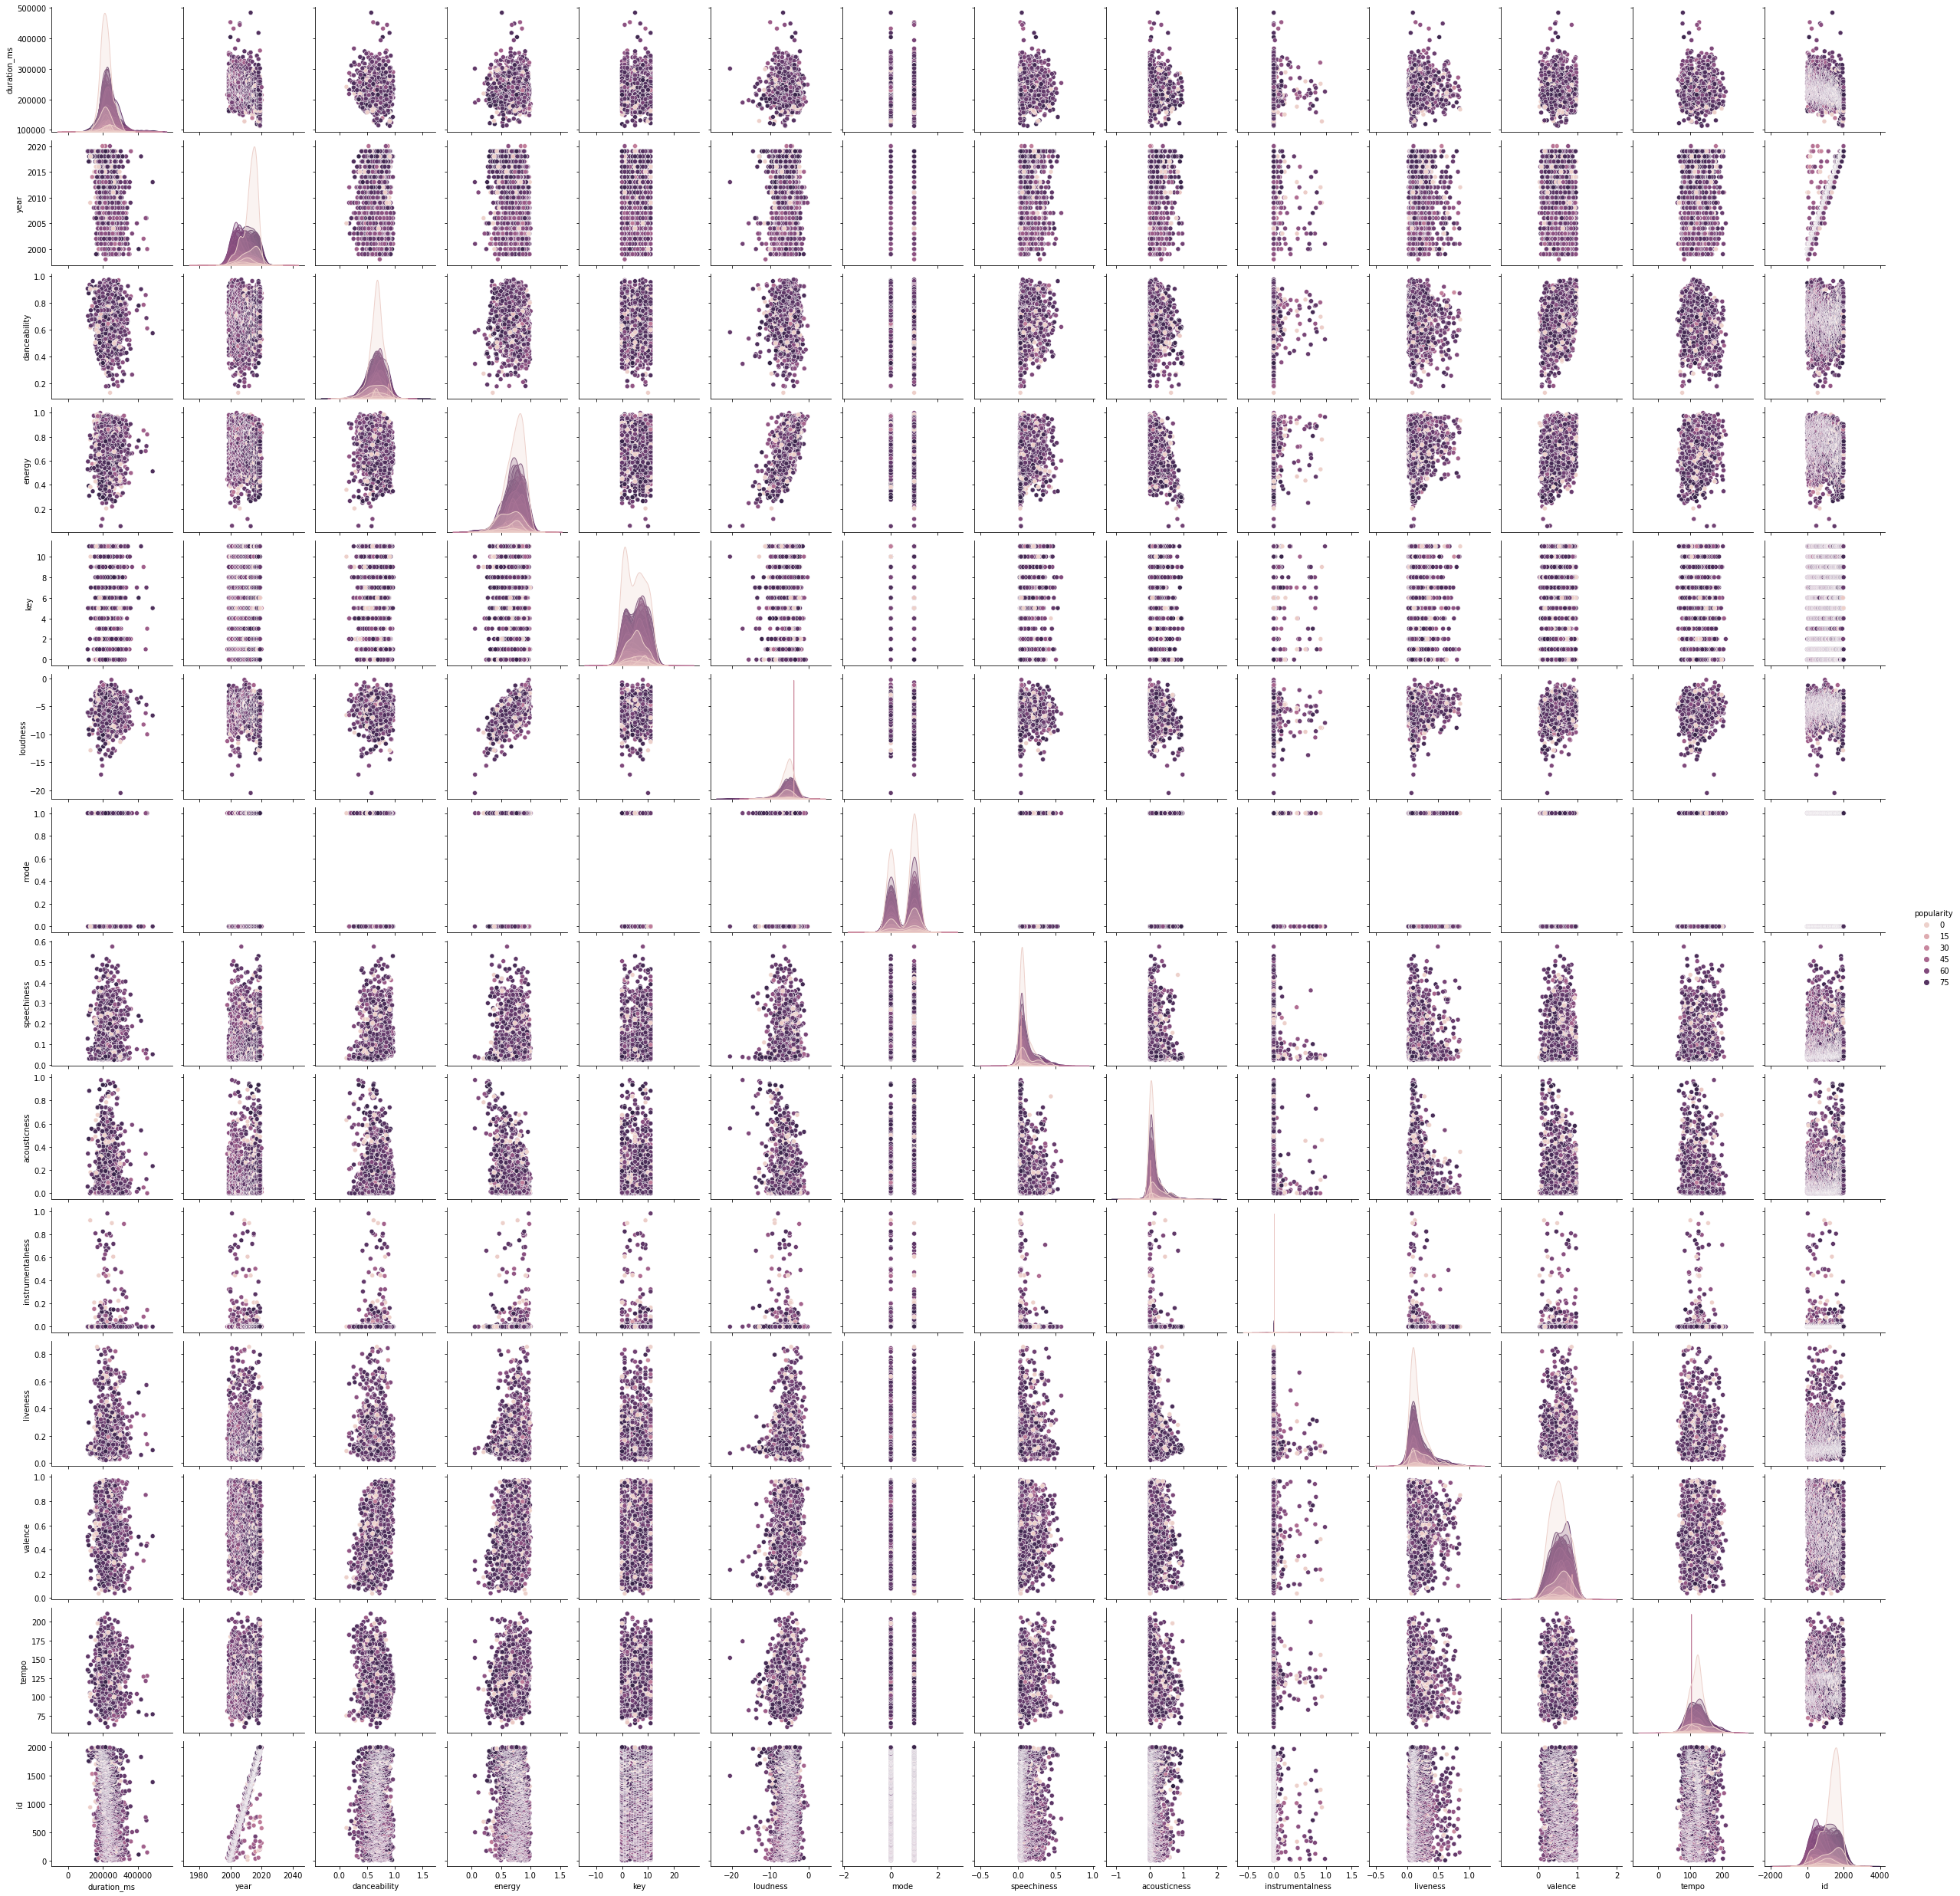

In [7]:
sb.pairplot(top_hits_scatter, hue='popularity')

There were outliers we could see in the scatter plot matrix so we removed any row which had a value in a column that was more than three standard deviations away from the mean of that column

In [8]:
from scipy import stats
import numpy as np

before_removing = len(top_hits_scatter)
top_hits_scatter_no_outliers = top_hits_scatter[(np.abs(stats.zscore(top_hits_scatter)) < 3).all(axis=1)]

top_hits_scatter_no_outliers = top_hits_scatter_no_outliers.dropna()

print('Removed outliers: {}'.format(before_removing - len(top_hits_scatter_no_outliers)))

Removed outliers: 203


Without outliers, we plotted another scatterplot matrix, in which we were clearly able to see the positive results

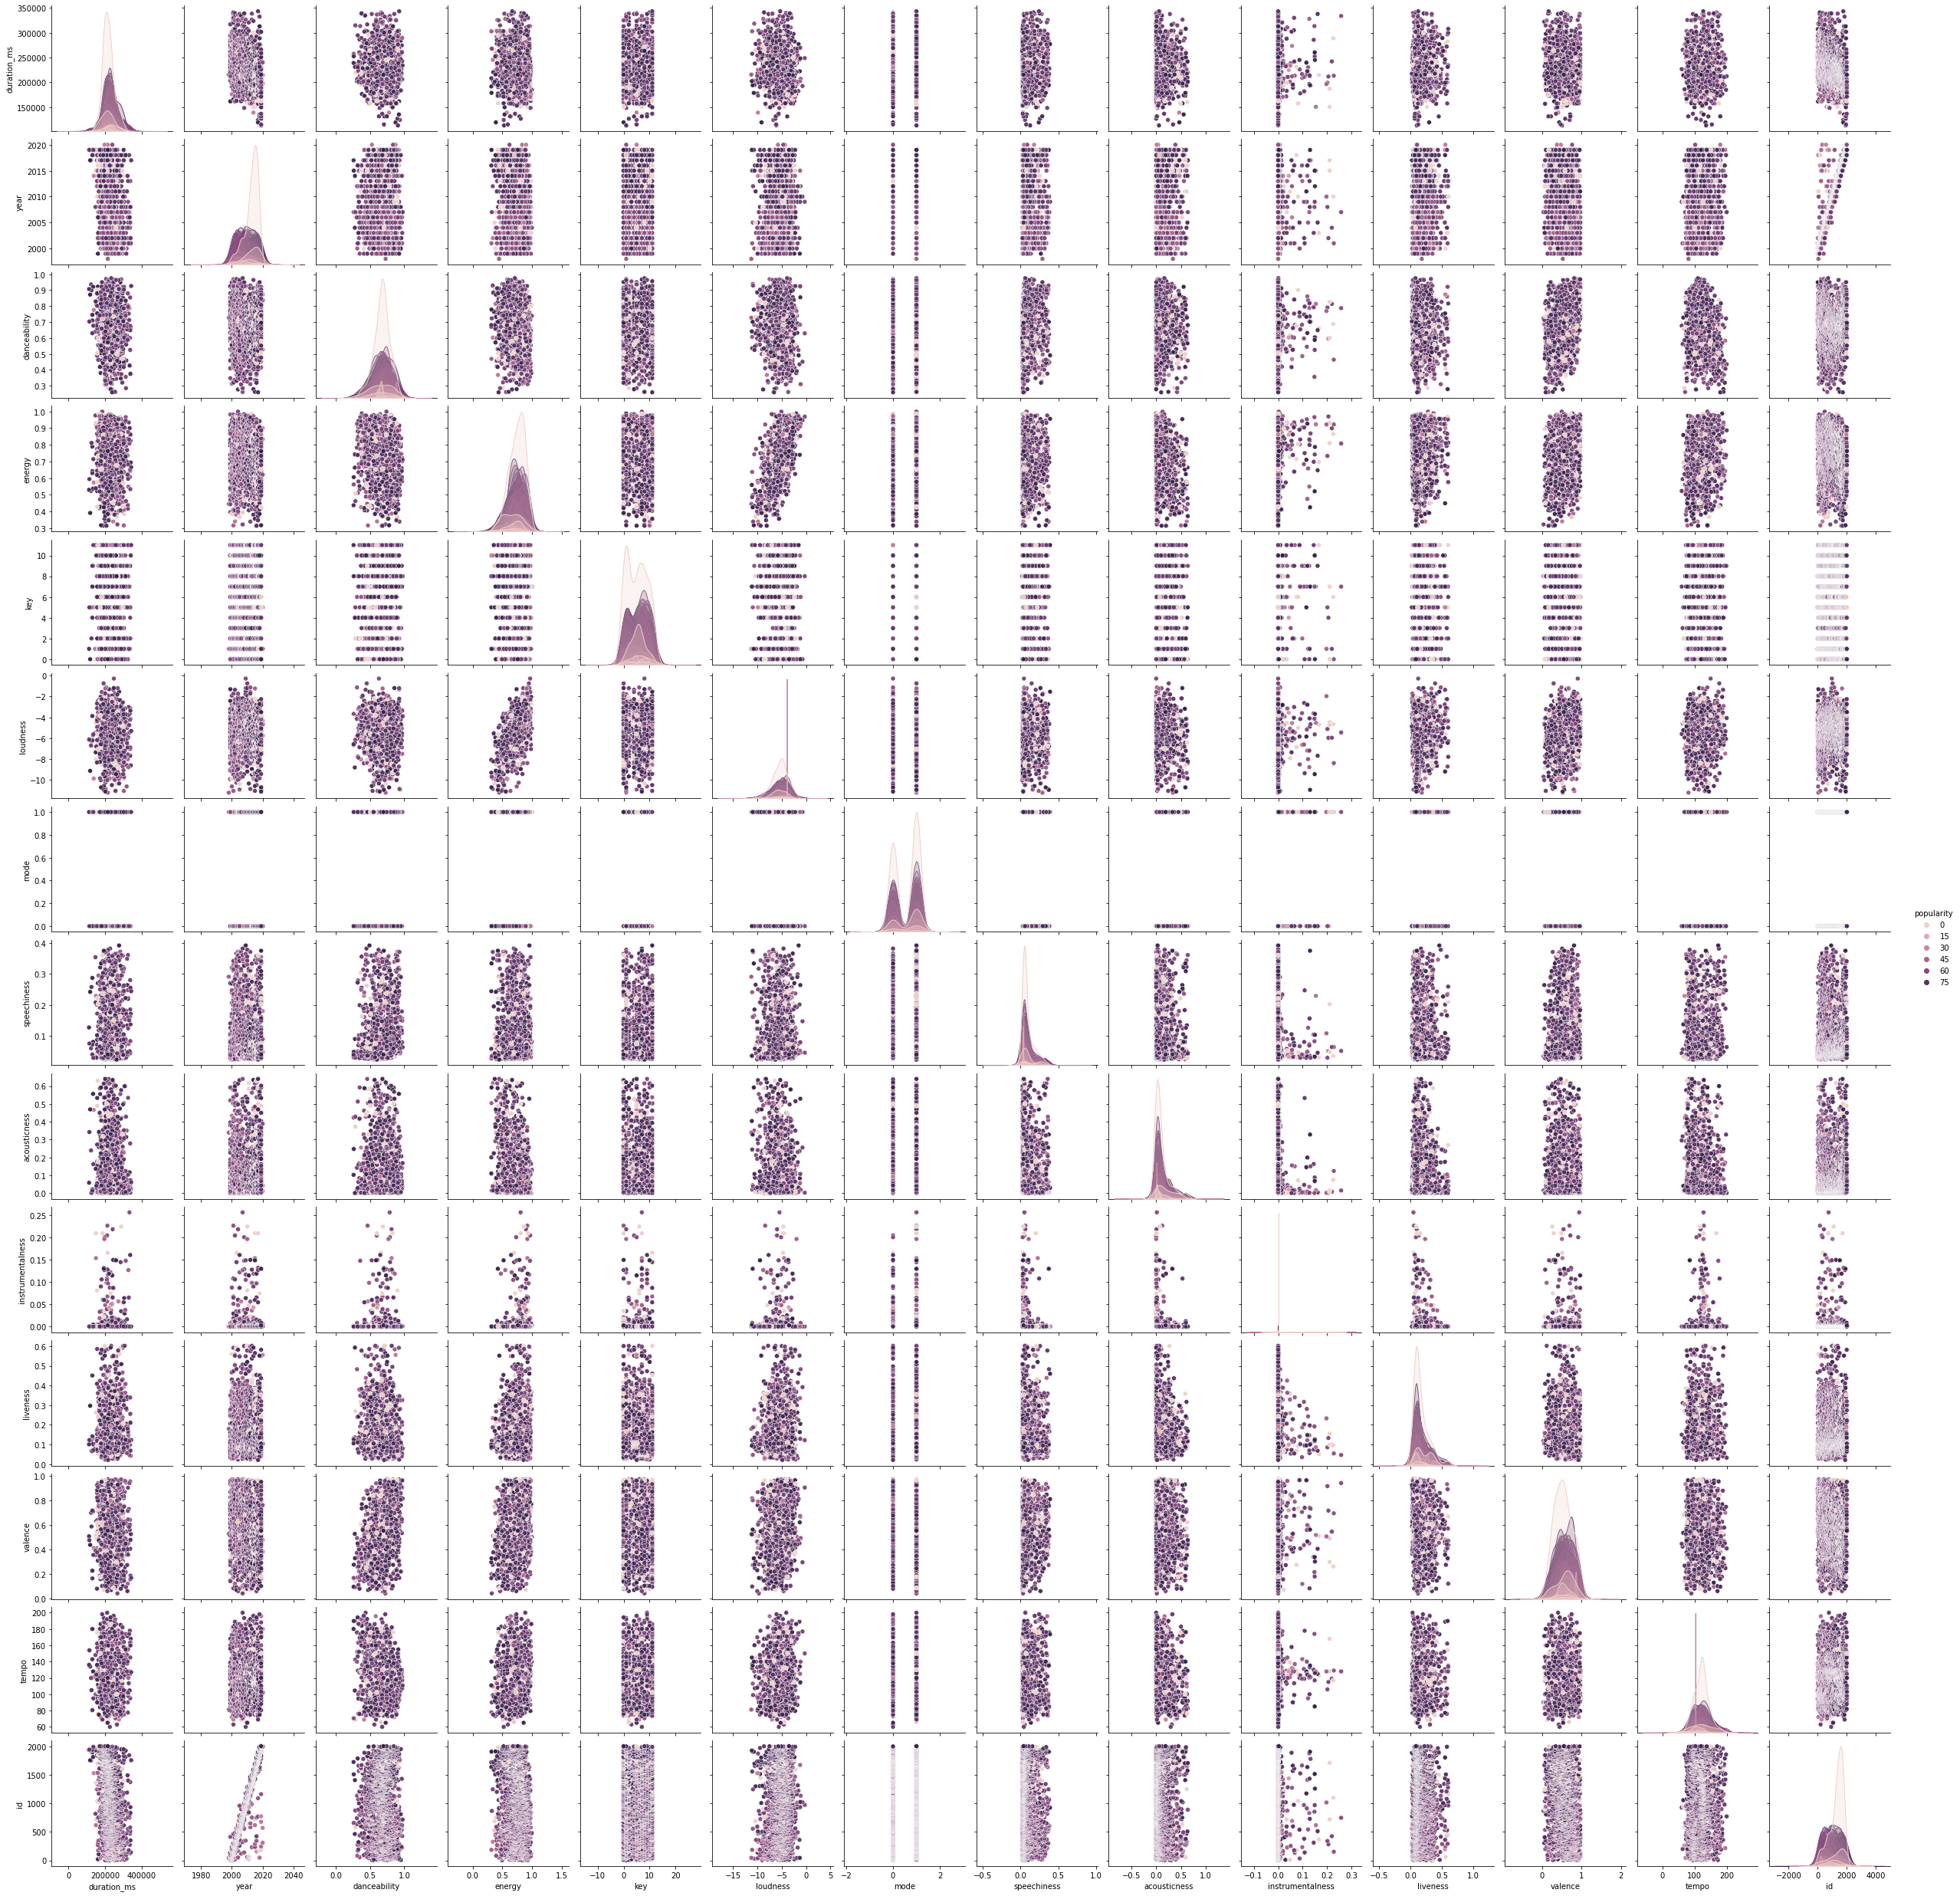

In [9]:
sb.pairplot(top_hits_scatter_no_outliers, hue='popularity')

To make sure we kept the columns with non-numeric values we selected all rows in top_hits whoose id was in top_hits_scatter_no_outliers

In [10]:
id_array = top_hits_scatter_no_outliers['id'].tolist()
top_hits = top_hits.loc[top_hits['id'].isin(id_array)]
top_hits = top_hits.drop(columns=['id'])

## Data processing

### Popularity
Since this is a classification problem and our goal was to predict popularity, we had to split the data, which ranked popularity from 0 to 100, into smaller aggregated rankings.

However, there were a few complications due to the large data concentration, with over half of the data between the values of 60 and 80.

Our solution was to simply remove some data between those two values, letting us create balanced popularity rankins, but due to the data size we have, only 2000, with a few having been removed due to errors in the data and outliers, we discarded the solution as, in our opinion, would create a dataset too small.

Since we found no other alternative, we ranked the data making sure that all rankings had a similar ammount of data in them, which came at the cost of balance with the 'Low' ranking spanning values from 0 to 57, while the 'Average' one had only values in between 57 and 66, even though they both had the same ammount of entries.

High         449
Average      448
Low          448
Very High    430
Name: pop_rank, dtype: int64


<AxesSubplot:>

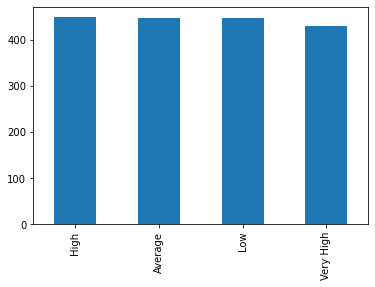

In [11]:
top_hits['pop_rank'] = pd.NaT
top_hits['pop_rank'].mask(top_hits['popularity'] < 57, 'Low', inplace=True)
top_hits['pop_rank'].mask(top_hits['popularity'].between(57, 66), 'Average', inplace=True)
top_hits['pop_rank'].mask(top_hits['popularity'].between(66, 74), 'High', inplace=True)
top_hits['pop_rank'].mask(top_hits['popularity'] >= 74, 'Very High', inplace=True)

print(top_hits['pop_rank'].value_counts())
top_hits['pop_rank'].value_counts().plot(kind='bar')

We dropped the popularity column as it was no longer needed

In [12]:
top_hits = top_hits.drop(columns=['popularity'])

### Exploratory analysis
We checked for correlation between the attributes themselves and to the 'pop_rank' attribute:

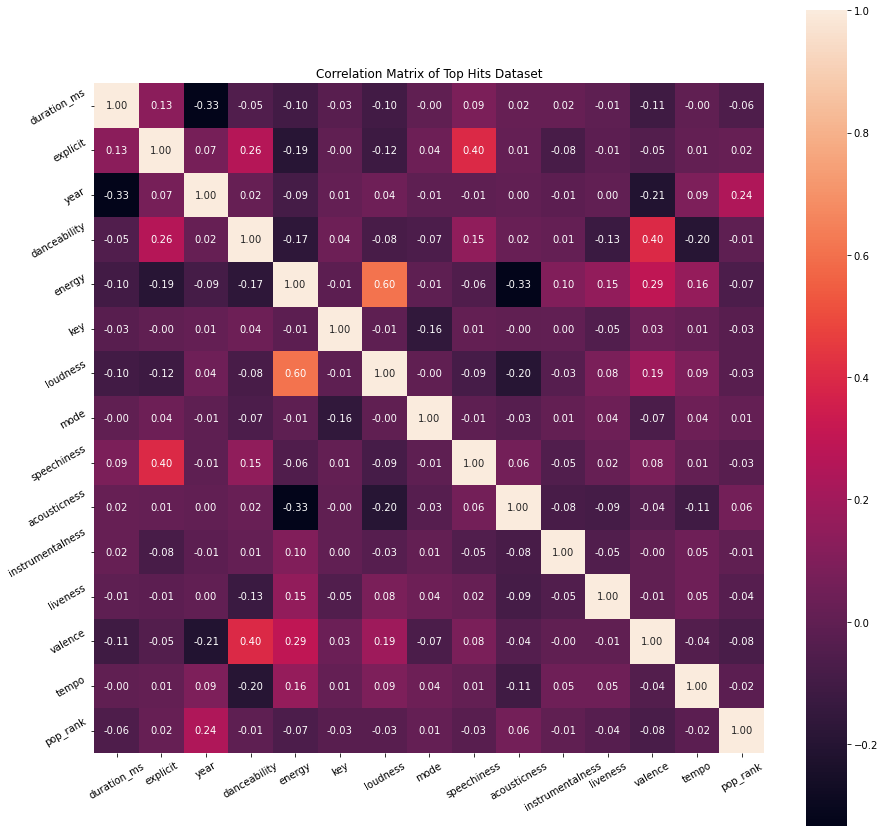

In [13]:
from sklearn import preprocessing
import matplotlib.pyplot as plt

le = preprocessing.LabelEncoder()
le.fit(top_hits['pop_rank'])
top_hits['pop_rank'] = le.transform(top_hits['pop_rank'])
corr_matrix = top_hits.corr()

plt.figure(figsize=(15,15))
plt.title('Correlation Matrix of Top Hits Dataset')
a = sb.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

With the resulting matrix, we could check the highest correlations from extracting the values from the top right triangle, since it was a mirrored matrix, and found that the highest correlation was of only 0.60.

Since the highest correlation was only 0.60, we decided to aggregate no attributes.

# Classification Algorithms
## Cross Validation & Parameter Tuning
Running each algorithm with the default parameters would not be enough, so we created an auxiliary function which would help find the best parameters for each algorithm.

To do this, we used <b>GridSearchCV</b> and we scored our models using <b>f1 weighted score</b>.

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

def get_best_model(dataset, model, parameter_grid, scaler=None): 
    inputs = top_hits.drop(columns=['pop_rank', 'song', 'artist', 'genre'])
    labels = top_hits['pop_rank']
    
    if(scaler != None):
        scaler = scaler.fit(x)
        inputs = scaler.transform(x)
    
    grid_search = GridSearchCV(
        model,
        param_grid=parameter_grid,
        cv=StratifiedKFold(n_splits=10),
        scoring="f1_weighted"
    )

    grid_search.fit(inputs, labels)
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

    return grid_search.best_estimator_

We created a function to calculate the precision, recall, accuracy and f-measure from a matrix

In [38]:
def calculate_metrics(confusion_matrix):
    FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
    FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
    TP = np.diag(confusion_matrix)
    TN = confusion_matrix.sum() - (FP + FN + TP)

    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    accuracy = (TP+TN)/(TP+FP+FN+TN)
    f_measure = (2 * TP) / (2* TP + FP + FN)

    print('Precision: ', precision)
    print('Recall: ', recall)
    print('Accuracy: ', accuracy)
    print('F-measure: ', f_measure)

## Decision Trees
First, by using the previously created auxuliary function, we got the Decision Tree model instance with the criteria that would provide us the best results

In [15]:
from sklearn.tree import DecisionTreeClassifier

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': range(3, 14),
                  'max_features': range(1, 14)}

decision_tree = get_best_model(top_hits, DecisionTreeClassifier(), parameter_grid)

Best score: 0.26817266997371886
Best parameters: {'criterion': 'entropy', 'max_depth': 11, 'max_features': 1, 'splitter': 'best'}


Since we had a very low score, we decided to test to try and find the reasoning and thus split the data into training and testing datasets, and trained the decision tree model, creating a confusion matrix from its results.

Score: 0.25900900900900903


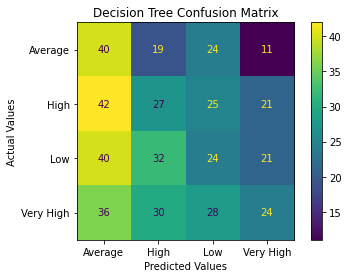

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

inputs = top_hits.drop(columns=['pop_rank', 'song', 'artist', 'genre'])
labels = top_hits['pop_rank']

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(inputs, labels, test_size=0.25, random_state=1)

decision_tree.fit(training_inputs, training_classes)
print('Score: {}'.format(decision_tree.score(testing_inputs, testing_classes)))
y_pred = decision_tree.predict(testing_inputs)

display_labels = ['Average', 'High', 'Low', 'Very High']

cmDT = confusion_matrix(testing_classes, y_pred)
cmdDT = ConfusionMatrixDisplay(cmDT, display_labels=display_labels)
cmdDT.plot()
cmdDT.ax_.set(title='Decision Tree Confusion Matrix', xlabel='Predicted Values', ylabel='Actual Values')
plt.show()

For Average, High, Low and Very High respectively we calculated the following values

In [39]:
calculate_metrics(cmDT)

Precision:  [0.25316456 0.25       0.23762376 0.31168831]
Recall:  [0.42553191 0.23478261 0.20512821 0.20338983]
Accuracy:  [0.61261261 0.61936937 0.61711712 0.66891892]
F-measure:  [0.31746032 0.24215247 0.22018349 0.24615385]


## K-Nearest Neighbour
This algorithm, due to the way it handles the data, most of the times requires data scaling, to which we used the <b>StandardScaler</b> from skitlearn.

First, we ran the default algorithm, choosing no parameters, and created a histogram to get an idea of how this algorithm performs in our dataset.

Text(0.5, 1.0, 'Average score: 0.26876150574493746')

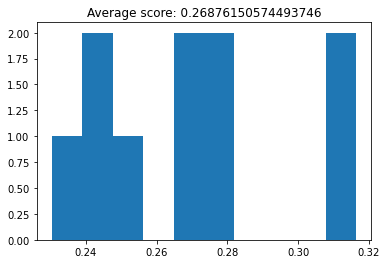

In [17]:
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

x = top_hits.drop(columns=['pop_rank', 'song', 'artist', 'genre'])
scaler = StandardScaler()
scaler = scaler.fit(x)
inputs = scaler.transform(x)

labels = top_hits['pop_rank']

knn = neighbors.KNeighborsClassifier()

cv_scores = cross_val_score(knn, inputs, labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))


Next, we customized the possible parameters, using a previously created function to get the best combination we could.

In [18]:
parameter_grid =  {
    'n_neighbors':[4, 5, 6, 7, 10, 15, 20, 30, 40],
    'leaf_size':[5, 10, 15, 20, 50, 100, 200, 400],
    'n_jobs':[-1],
    'algorithm':['auto']
}

knn = neighbors.KNeighborsClassifier()
best_knn = get_best_model(top_hits, knn, parameter_grid, scaler=StandardScaler())

Best score: 0.28240172863796903
Best parameters: {'algorithm': 'auto', 'leaf_size': 400, 'n_jobs': -1, 'n_neighbors': 10}


Although with customized parameters, we didn't get the highest value possible that we would be able to by using the default algorithm, we were still able to get a result on its high-end, sacrificing some of the score to get better consistency.

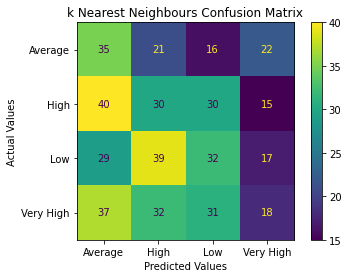

In [19]:
inputs = top_hits.drop(columns=['pop_rank', 'song', 'artist', 'genre'])
labels = top_hits['pop_rank']

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(inputs, labels, test_size=0.25, random_state=1)

best_knn.fit(training_inputs, training_classes)
y_pred = best_knn.predict(testing_inputs)

display_labels = ['Average', 'High', 'Low', 'Very High']

cmKNN = confusion_matrix(testing_classes, y_pred)
cmdKNN = ConfusionMatrixDisplay(cmKNN, display_labels=display_labels)
cmdKNN.plot()
cmdKNN.ax_.set(title='k Nearest Neighbours Confusion Matrix', xlabel='Predicted Values', ylabel='Actual Values')
plt.show()


For Average, High, Low and Very High respectively we calculated the following values

In [40]:
calculate_metrics(cmKNN)

Precision:  [0.24822695 0.24590164 0.29357798 0.25      ]
Recall:  [0.37234043 0.26086957 0.27350427 0.15254237]
Accuracy:  [0.62837838 0.60135135 0.63513514 0.65315315]
F-measure:  [0.29787234 0.25316456 0.28318584 0.18947368]


## Support Vector Machine


Text(0.5, 1.0, 'Average score: 0.2726560020313591')

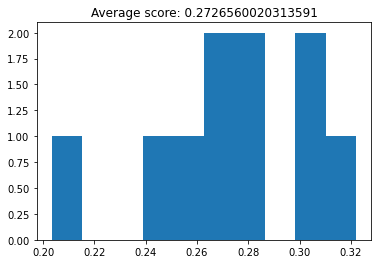

In [41]:
from sklearn import svm

x = top_hits.drop(columns=['pop_rank', 'song', 'artist', 'genre'])
scaler = StandardScaler()
scaler = scaler.fit(x)
inputs = scaler.transform(x)


SVM = svm.NuSVC()

cv_scores = cross_val_score(SVM, inputs, labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [42]:
parameter_grid =  {
    'nu': [0.0, 0.5, 1.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'probability': [False, True],
    'decision_function_shape': ['ovr', 'ovo']
}

SVM = svm.NuSVC()
best_svm = get_best_model(top_hits, SVM, parameter_grid, scaler=StandardScaler())

Best score: 0.28766793456581896
Best parameters: {'decision_function_shape': 'ovr', 'kernel': 'poly', 'nu': 0.5, 'probability': False}


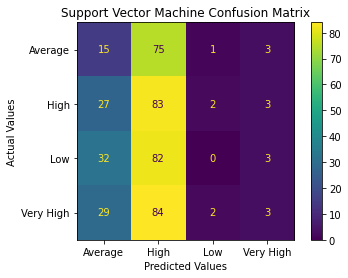

In [43]:
inputs = top_hits.drop(columns=['pop_rank', 'song', 'artist', 'genre'])
labels = top_hits['pop_rank']

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(inputs, labels, test_size=0.25, random_state=1)

best_svm.fit(training_inputs, training_classes)
y_pred = best_svm.predict(testing_inputs)

display_labels = ['Average', 'High', 'Low', 'Very High']

cmSVM = confusion_matrix(testing_classes, y_pred)
cmdSVM = ConfusionMatrixDisplay(cmSVM, display_labels=display_labels)
cmdSVM.plot()
cmdSVM.ax_.set(title='Support Vector Machine Confusion Matrix', xlabel='Predicted Values', ylabel='Actual Values')
plt.show()

For Average, High, Low and Very High respectively we calculated the following values

In [44]:
calculate_metrics(cmSVM)

Precision:  [0.14563107 0.25617284 0.         0.25      ]
Recall:  [0.15957447 0.72173913 0.         0.02542373]
Accuracy:  [0.62387387 0.38513514 0.72522523 0.72072072]
F-measure:  [0.15228426 0.37813212 0.         0.04615385]


Clearly, Support-Vector Machine is not the best algorithm to use on our dataset.

## Neural Networks
Even though it wasn't one of our selected algorithms we tried to use Neural Networks on the problem since we were getting bad results. Using the Multi-Layer Perceptron classifier


Text(0.5, 1.0, 'Average score: 0.2906874880975052')

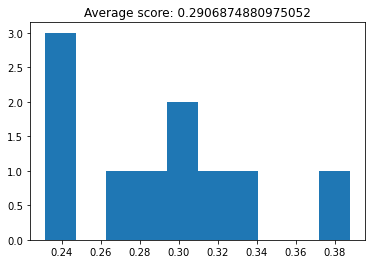

In [22]:
from sklearn import neural_network

x = top_hits.drop(columns=['pop_rank', 'song', 'artist', 'genre'])
scaler = StandardScaler()
scaler = scaler.fit(x)
inputs = scaler.transform(x)

labels = top_hits['pop_rank']

nn = neural_network.MLPClassifier()

cv_scores = cross_val_score(nn, inputs, labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

We tried for 'max_iter' (default=200, 1000, 10000). But for (200, 1000) the optimization did not converge. Advice: 10000 takes a __lot of time to run__ but is the best value.

In [23]:
parameter_grid =  {
    'max_iter': [10000],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1]
}

best_nn = get_best_model(top_hits, nn, parameter_grid, scaler=StandardScaler())

Best score: 0.27712553931234596
Best parameters: {'alpha': 0.01, 'max_iter': 10000}


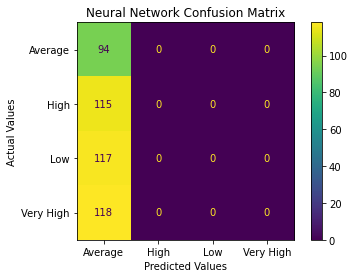

In [24]:
inputs = top_hits.drop(columns=['pop_rank', 'song', 'artist', 'genre'])
labels = top_hits['pop_rank']

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(inputs, labels, test_size=0.25, random_state=1)

best_nn.fit(training_inputs, training_classes)
y_pred = best_nn.predict(testing_inputs)

display_labels = ['Average', 'High', 'Low', 'Very High']

cmNN = confusion_matrix(testing_classes, y_pred)
cmdNN = ConfusionMatrixDisplay(cmNN, display_labels=display_labels)
cmdNN.plot()
cmdNN.ax_.set(title='Neural Network Confusion Matrix', xlabel='Predicted Values', ylabel='Actual Values')
plt.show()

Like Support-Vector Machine, Neural Networks don't work on our dataset.

# Conclusion
Bad data leads to bad models. Even removing the error data and outliers, the concentrated data causing the split being made with small and uneven intervals leads to a false analysis when given to the algorithms. This data is not fit to be analysed with classfication algorithms.